In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime

In [19]:
def fetch_data_vale3(start_date, end_date):
    """
    Baixa os dados históricos de VALE3 usando a API do Yahoo Finance.
    """
    ticker = "VALE3.SA"  
    data = yf.download(ticker, start=start_date, end=end_date)
    if 'Adj Close' not in data.columns:
        data['Adj Close'] = data['Close']  # Usa 'Close' como fallback para 'Adj Close'
    return data

In [20]:
def calculate_metrics(data):
    data['Daily Return'] = data['Adj Close'].pct_change()
    data['Moving Average (30d)'] = data['Adj Close'].rolling(window=30).mean()
    data['Volatility (30d)'] = data['Daily Return'].rolling(window=30).std()
    return data

In [21]:
def plot_data(data):


    plt.figure(figsize=(10, 6))
    plt.plot(data['Adj Close'], label='Preço Ajustado', color='blue')
    plt.plot(data['Moving Average (30d)'], label='Média Móvel (30d)', linestyle='--', color='orange')
    plt.title('VALE3 - Histórico de Preços Ajustados')
    plt.xlabel('Data')
    plt.ylabel('Preço (R$)')
    plt.legend()
    plt.grid()
    plt.show()


    fig = px.histogram(
        data, 
        x='Daily Return', 
        title='VALE3 - Retornos Diários', 
        nbins=50, 
        template='plotly_dark'
    )
    fig.show()

In [22]:
def save_report(data):
    """
    Salva um relatório em formato Excel.
    """
    today = datetime.now().strftime('%Y-%m-%d')
    report_name = f'report_VALE3_{today}.xlsx'
    data.to_excel(report_name)
    print(f'Relatório salvo como: {report_name}')


In [23]:
def analyze_vale3(start_date, end_date):

    print('Analisando VALE3...')
    data = fetch_data_vale3(start_date, end_date)
    if data.empty:
        print("Erro: Não foi possível obter dados para VALE3.")
        return

    data = calculate_metrics(data)
    plot_data(data)
    save_report(data)
    print('Análise de VALE3 concluída!')

[*********************100%***********************]  1 of 1 completed

Analisando VALE3...


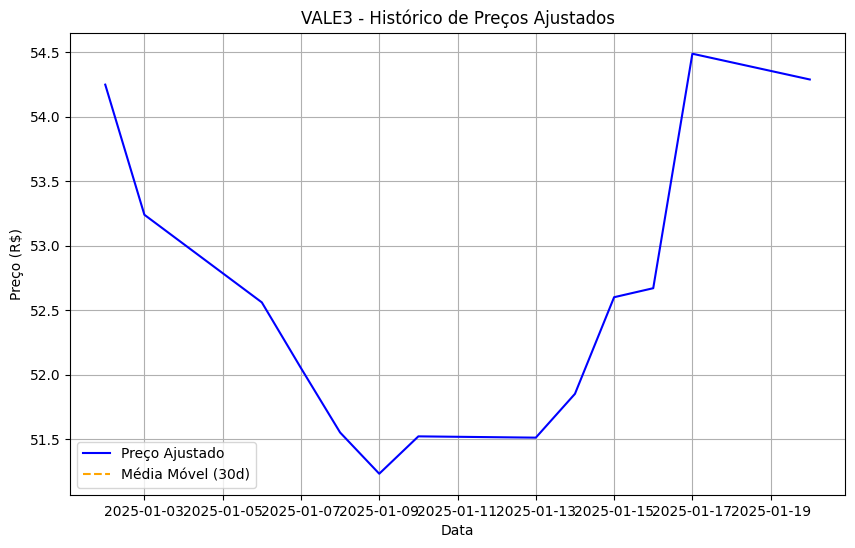

ModuleNotFoundError: No module named 'openpyxl'

In [24]:
if __name__ == "__main__":
    start_date = "2025-01-01"
    end_date = datetime.now().strftime('%Y-%m-%d')
    analyze_vale3(start_date, end_date)